In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-classification-dataset/Obesity Classification.csv


Loading Data

In [2]:
data = pd.read_csv('/kaggle/input/obesity-classification-dataset/Obesity Classification.csv')
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [3]:
data.isnull().count()

ID        108
Age       108
Gender    108
Height    108
Weight    108
BMI       108
Label     108
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

data = pd.read_csv('/kaggle/input/obesity-classification-dataset/Obesity Classification.csv')

features = [c for c in data.columns if c != 'Label']
X = data[features]
label_encoder = LabelEncoder()
y1 = label_encoder.fit_transform(data['Label'])
y = data['Label']
y.head()

0    Normal Weight
1    Normal Weight
2       Overweight
3      Underweight
4            Obese
Name: Label, dtype: object

Data Preprocessing and Train Test Split

In [6]:
num_features = ['ID','Age','Height','Weight','BMI']
cat_features = ['Gender']

transformer_num = make_pipeline(
    SimpleImputer(strategy='constant'),
    StandardScaler()
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy='constant',fill_value='NA'),
    OneHotEncoder(handle_unknown='ignore')
)
preprocessor = make_column_transformer(
    (transformer_num,num_features),
    (transformer_cat,cat_features)
)
X_train, X_valid, y_train, y_valid = train_test_split(X,y)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = transformer_cat.fit_transform(y_train.values.reshape(-1,1)).toarray()
y_valid = transformer_cat.transform(y_valid.values.reshape(-1,1)).toarray()
input_shape = [X_train.shape[1]]
y_train.shape

(81, 4)

**Fitting and predicting different Models and checking their accuracy scores**

Decision Tree Classifier Model

In [7]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score

y1_pred = model1.predict(X_valid)
# If y_test is one-hot encoded, you may need to convert it to single label format
y1_test_single = np.argmax(y_valid, axis=1)
y1_pred_single = np.argmax(y1_pred, axis=1)

# Now you can compute the metrics
print(classification_report(y1_test_single, y1_pred_single,zero_division=0))
print(confusion_matrix(y1_test_single, y1_pred_single))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       1.00      1.00      1.00         3
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00        13

    accuracy                           0.96        27
   macro avg       0.95      0.96      0.95        27
weighted avg       0.97      0.96      0.96        27

[[ 6  0  1  0]
 [ 0  3  0  0]
 [ 0  0  4  0]
 [ 0  0  0 13]]


Random Forest Classifier Model

In [9]:
from sklearn.ensemble import RandomForestClassifier
model2 = DecisionTreeClassifier(random_state=0)
model2.fit(X_train,y_train)
y2_pred = model2.predict(X_valid)

In [10]:
# If y_test is one-hot encoded, you may need to convert it to single label format
y2_test_single = np.argmax(y_valid, axis=1)
y2_pred_single = np.argmax(y2_pred, axis=1)

# Now you can compute the metrics
print(classification_report(y2_test_single, y2_pred_single,zero_division=0))
print(confusion_matrix(y2_test_single, y2_pred_single))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       1.00      1.00      1.00         3
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00        13

    accuracy                           0.96        27
   macro avg       0.95      0.96      0.95        27
weighted avg       0.97      0.96      0.96        27

[[ 6  0  1  0]
 [ 0  3  0  0]
 [ 0  0  4  0]
 [ 0  0  0 13]]


Deeplearning with Tensor Flow

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Validation loss: 
 Best Validation accuracy: 


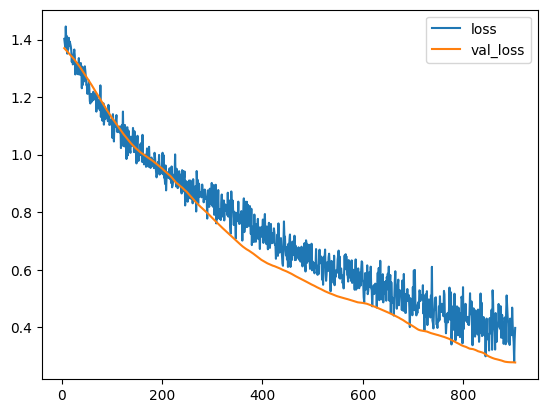

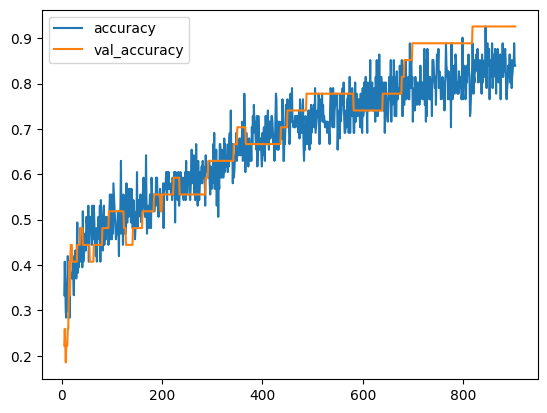

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping


model = keras.Sequential([
    layers.Dense(5,activation='relu',input_shape = input_shape),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.2),
    layers.Dense(5,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.2),
    layers.Dense(5,activation='relu'),
    layers.Dense(4,activation='softmax')
])

model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience= 10,
    min_delta= 0.001,
    restore_best_weights= True,
)

history = model.fit(
    X_train,y_train,
    validation_data=(X_valid,y_valid),
    batch_size=600,
    epochs=2000,
    callbacks= [early_stopping],
    verbose = 0
)

history_df = pd.DataFrame(history.history)
history_df.loc[5:,['loss','val_loss']].plot()
history_df.loc[5:,['accuracy','val_accuracy']].plot()
print(('Best Validation loss: ') +
     ('\n Best Validation accuracy: ').
     format(history_df['val_loss'].min(),
           history_df['val_accuracy'].max()))

In [12]:
y_pred = model.predict(X_valid)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [13]:
# If y_test is one-hot encoded, you may need to convert it to single label format
y_test_single = np.argmax(y_valid, axis=1)
y_pred_single = np.argmax(y_pred, axis=1)

# Now you can compute the metrics
print(classification_report(y_test_single, y_pred_single,zero_division=0))
print(confusion_matrix(y_test_single, y_pred_single))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       1.00      1.00      1.00         3
           2       0.67      1.00      0.80         4
           3       1.00      1.00      1.00        13

    accuracy                           0.93        27
   macro avg       0.92      0.93      0.91        27
weighted avg       0.95      0.93      0.93        27

[[ 5  0  2  0]
 [ 0  3  0  0]
 [ 0  0  4  0]
 [ 0  0  0 13]]
